In [ ]:
import requests
import base64
import zlib


def structurizr_to_diagram(dsl_code: str, format: str = 'svg') -> bytes:
    """
    Convierte código Structurizr DSL a diagrama usando la API de Kroki
    
    Args:
        dsl_code: Código en Structurizr DSL como string
        format: Formato de salida ('svg', 'png', 'pdf', 'jpeg')
    
    Returns:
        Contenido del diagrama en bytes
        
    Raises:
        Exception: Si hay error en la conversión
    """
    try:
        # 1. Comprimir y codificar el código DSL
        compressed = zlib.compress(dsl_code.encode('utf-8'), level=9)
        encoded = base64.urlsafe_b64encode(compressed).decode('utf-8')
        
        # 2. Construir URL de la API de Kroki
        url = f"https://kroki.io/structurizr/{format}/{encoded}"
        
        # 3. Hacer petición y devolver contenido
        response = requests.get(url, timeout=30)
        response.raise_for_status()
        
        return response.content
        
    except Exception as e:
        raise Exception(f"Error convirtiendo DSL a diagrama: {str(e)}")


def display_structurizr_diagram(dsl_code: str, format: str = 'svg'):
    """
    Convierte DSL a diagrama y lo muestra en Jupyter Notebook
    
    Args:
        dsl_code: Código Structurizr DSL
        format: Formato ('svg' recomendado para notebooks, también 'png')
    
    Returns:
        Objeto para mostrar en el notebook
    """
    try:
        from IPython.display import SVG, Image, display
        
        diagram_bytes = structurizr_to_diagram(dsl_code, format)
        
        if format.lower() == 'svg':
            return SVG(data=diagram_bytes)
        else:
            return Image(data=diagram_bytes)
            
    except ImportError:
        print("Error: IPython no está disponible. ¿Estás ejecutando esto en un Jupyter Notebook?")
        return None
    except Exception as e:
        print(f"Error mostrando diagrama: {e}")
        return None


def show_diagram(dsl_code: str, format: str = 'svg'):
    """
    Función más simple para mostrar diagrama directamente
    
    Args:
        dsl_code: Código Structurizr DSL
        format: Formato del diagrama
    """
    diagram = display_structurizr_diagram(dsl_code, format)
    if diagram:
        from IPython.display import display
        display(diagram)


# Función auxiliar para guardar directamente a archivo (opcional)
def structurizr_to_file(dsl_code: str, output_file: str, format: str = 'svg'):
    """
    Convierte DSL a diagrama y guarda en archivo
    
    Args:
        dsl_code: Código Structurizr DSL
        output_file: Ruta del archivo de salida
        format: Formato ('svg', 'png', 'pdf', 'jpeg')
    """
    diagram_bytes = structurizr_to_diagram(dsl_code, format)
    
    with open(output_file, 'wb') as f:
        f.write(diagram_bytes)
    
    print(f"Diagrama guardado en: {output_file}")

Mostrando diagrama en notebook:


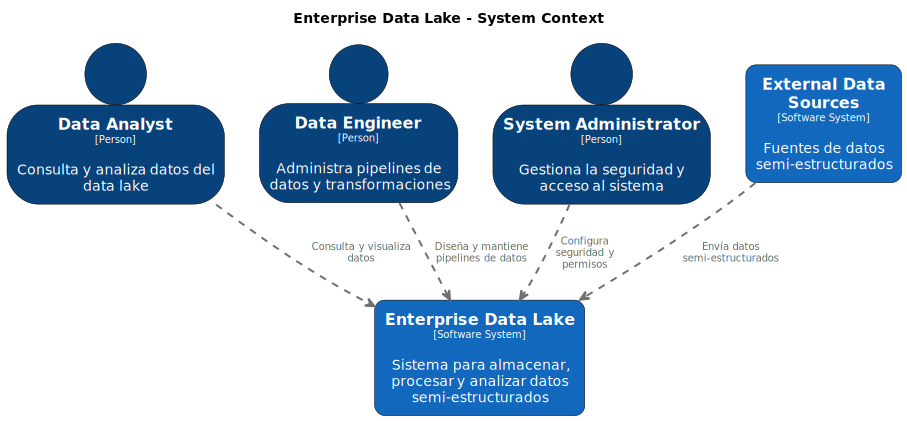

In [6]:
dsl_example = '''
workspace "AWS Enterprise Data Lake" {
    model {
        // Personas
        dataAnalyst = person "Data Analyst" "Consulta y analiza datos del data lake"
        dataEngineer = person "Data Engineer" "Administra pipelines de datos y transformaciones"
        systemAdmin = person "System Administrator" "Gestiona la seguridad y acceso al sistema"

        // Sistemas externos
        externalDataSources = softwareSystem "External Data Sources" "Fuentes de datos semi-estructurados" "External"

        // Sistema principal
        dataLakeSystem = softwareSystem "Enterprise Data Lake" "Sistema para almacenar, procesar y analizar datos semi-estructurados" {
            // Servicios de ingesta
            kinesisStreams = container "Amazon Kinesis Data Streams" "Ingesta de datos en tiempo real" "AWS Kinesis"
            kinesisFirehose = container "Amazon Kinesis Data Firehose" "Entrega automática de datos" "AWS Kinesis"

            // Servicios de almacenamiento
            s3Storage = container "Amazon S3" "Almacenamiento principal del data lake" "AWS S3"

            // Servicios de procesamiento y catalogación
            lakeFormation = container "AWS Lake Formation" "Gobierno y administración del data lake" "AWS Lake Formation"
            glueService = container "AWS Glue" "Catalogación y procesamiento ETL" "AWS Glue"

            // Servicios de análisis
            athenaService = container "Amazon Athena" "Consultas SQL ad-hoc" "AWS Athena"
            kinesisAnalytics = container "Amazon Kinesis Data Analytics" "Análisis en tiempo real" "AWS Kinesis Analytics"
            quickSight = container "Amazon QuickSight" "Visualización de datos y dashboards" "AWS QuickSight"

            // Servicios de seguridad
            iamService = container "AWS IAM" "Control de acceso y seguridad" "AWS IAM"
            kmsService = container "AWS KMS" "Encriptación de datos" "AWS KMS"
            macieService = container "Amazon Macie" "Descubrimiento y protección de datos sensibles" "AWS Macie"
        }

        // Relaciones de personas con el sistema
        dataAnalyst -> dataLakeSystem "Consulta y visualiza datos"
        dataEngineer -> dataLakeSystem "Diseña y mantiene pipelines de datos"
        systemAdmin -> dataLakeSystem "Configura seguridad y permisos"

        // Relaciones con sistemas externos
        externalDataSources -> dataLakeSystem "Envía datos semi-estructurados"

        // Relaciones internas entre servicios (contenedores)
        kinesisStreams -> kinesisFirehose "Transfiere datos"
        kinesisFirehose -> s3Storage "Almacena datos en zonas raw, processed y curated"

        lakeFormation -> s3Storage "Gestiona permisos y gobierno"
        glueService -> s3Storage "Cataloga y procesa datos"

        athenaService -> glueService "Usa catálogo de datos"
        athenaService -> s3Storage "Consulta datos"

        kinesisAnalytics -> kinesisStreams "Analiza flujos en tiempo real"

        quickSight -> athenaService "Visualiza resultados de consultas"
        quickSight -> kinesisAnalytics "Visualiza análisis en tiempo real"

        iamService -> lakeFormation "Proporciona control de acceso"
        kmsService -> s3Storage "Encripta datos"
        macieService -> s3Storage "Detecta información sensible"
    }

    views {
        systemContext dataLakeSystem {
            include *
            autoLayout
        }

        container dataLakeSystem {
            include *
            autoLayout
        }

        theme default
    }
}
'''
    
try:
    # Para Jupyter Notebook - Mostrar diagrama directamente
    print("Mostrando diagrama en notebook:")
    show_diagram(dsl_example, 'svg')
    
    # Alternativa: obtener objeto para mostrar manualmente
    # diagram = display_structurizr_diagram(dsl_example, 'svg')
    # display(diagram)  # necesitas: from IPython.display import display
    
    # Solo si quieres también guardar a archivo
    # structurizr_to_file(dsl_example, 'diagrama.svg', 'svg')
    
except Exception as e:
    print(f"Error: {e}")